In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2353,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
483,41523,Male,9.0,0,0,No,children,Rural,94.59,20.0,Unknown,0
1070,42550,Female,81.0,0,0,Yes,Self-employed,Rural,246.34,21.1,never smoked,0
4220,35941,Male,38.0,0,0,Yes,Private,Urban,167.16,18.3,never smoked,0
4385,60981,Female,26.0,0,0,No,Private,Rural,130.07,33.1,never smoked,0


In [ ]:
df[['gender','id']].groupby(['gender']).count()


,id
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df= df[df['gender']!='Other']

In [ ]:
df[['gender','id']].groupby(['gender']).count()

,id
gender,
Female,2994
Male,2115


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
mean_bmi_for_stroke = df[df['stroke']==1]['bmi'].mean()

In [ ]:
mean_bmi_for_stroke

30.471291866028707

In [ ]:
mean_bmi_for_nostroke = df[df['stroke']!=1]['bmi'].mean()

In [ ]:
mean_bmi_for_nostroke

28.82443072994254

In [ ]:
df.loc[df['stroke']==1,'bmi']= df.loc[df['stroke']==1,'bmi'].fillna(mean_bmi_for_stroke)

In [ ]:
df.loc[df['stroke']!=1,'bmi']= df.loc[df['stroke']!=1,'bmi'].fillna(mean_bmi_for_nostroke)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3561,71420,Male,27.0,0,0,No,Govt_job,Rural,65.12,41.100000,smokes,0
2548,452,Male,48.0,1,0,Yes,Private,Urban,173.14,37.000000,smokes,0
4335,3700,Male,37.0,0,0,Yes,Private,Urban,232.29,40.800000,smokes,0
180,54567,Female,46.0,0,0,Yes,Private,Urban,78.18,30.800000,never smoked,1
879,4808,Female,71.0,0,0,Yes,Self-employed,Urban,91.35,28.824431,formerly smoked,0


In [ ]:
df.drop('id',axis = 1, inplace = True) #id is not important feature

<ipython-input-18-06447f2e4474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id',axis = 1, inplace = True) #id is not important feature


In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4918,Male,75.0,0,0,Yes,Govt_job,Rural,79.49,28.9,Unknown,0
3385,Male,11.0,0,0,No,children,Rural,87.54,24.4,Unknown,0
4125,Male,69.0,0,0,Yes,Private,Urban,89.06,34.8,formerly smoked,0
4590,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
1016,Female,51.0,0,0,Yes,Self-employed,Urban,143.15,44.7,formerly smoked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

In [ ]:
gender = enc.fit_transform(df['gender'])

In [ ]:
smoking_status = enc.fit_transform(df['smoking_status'])

In [ ]:
ever_married = enc.fit_transform(df['ever_married'])
work_type	= enc.fit_transform(df['work_type'])
Residence_type = enc.fit_transform(df['Residence_type'])


In [ ]:
df['gender'] = gender

<ipython-input-24-4708ca28f16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = gender


In [ ]:
df['Residence_type'] = Residence_type
df['work_type'] = work_type
df['ever_married']= ever_married
df['smoking_status']= smoking_status


<ipython-input-25-c0ead61d8110>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'] = Residence_type
<ipython-input-25-c0ead61d8110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type'] = work_type
<ipython-input-25-c0ead61d8110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1864,0,56.0,0,0,1,2,1,114.33,30.7,3,0
4461,0,53.0,0,0,1,2,0,105.28,23.1,2,0
4098,1,51.0,0,0,1,2,0,77.07,32.1,1,0
1008,0,42.0,0,0,1,2,0,84.86,22.8,0,0
296,0,66.0,0,0,1,2,0,141.24,28.5,2,0


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,30.471292,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.824431,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
x= df.drop('stroke', axis=1)

In [ ]:
y = df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.21,random_state= 3)

In [ ]:
x_train


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2984,1,12.00,0,0,0,4,1,111.47,32.3,2
1975,1,0.56,0,0,0,4,0,111.77,21.1,0
4100,0,17.00,0,0,0,2,0,109.39,26.3,2
1065,1,67.00,0,0,1,0,1,67.79,26.0,1
41,1,54.00,0,0,1,2,1,71.22,28.5,2
...,...,...,...,...,...,...,...,...,...,...
789,0,54.00,0,0,1,2,0,111.41,31.1,2
968,0,55.00,0,0,1,2,0,112.47,32.8,3
1667,0,40.00,0,0,1,2,0,191.48,27.9,3
3322,0,58.00,0,0,0,2,1,83.93,25.6,1


In [ ]:
y_train


2984    0
1975    0
4100    0
1065    0
41      1
       ..
789     0
968     0
1667    0
3322    0
1688    0
Name: stroke, Length: 4036, dtype: int64

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.904695,1.376982,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.699503,1.071626,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
x_train_std= std.fit_transform(x_train)
x_test_std = std.transform(x_test)

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.03579511, 0.16898966, 0.02556799, 0.0217434 , 0.01384857,
       0.03364061, 0.02749261, 0.27218745, 0.33843392, 0.06230065])

In [ ]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
y_pred = dt.predict(x_test_std)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
ac_dt=accuracy_score(y_test, y_pred)

In [ ]:
ac_dt

0.9114631873252563

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


confusion matrix :
[[968  58]
 [ 37  10]]


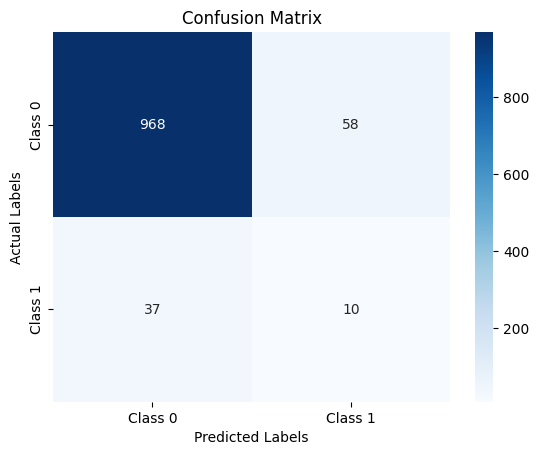

In [ ]:
cm_dt = confusion_matrix(y_test,y_pred)
print('confusion matrix :')
print(cm_dt)
# Create a Seaborn heatmap
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test_std)

In [ ]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ac_lr = accuracy_score(y_test,y_pred_lr)

In [ ]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
print('confusion matrix :')
print(cm_lr)

confusion matrix :
[[1026    0]
 [  47    0]]


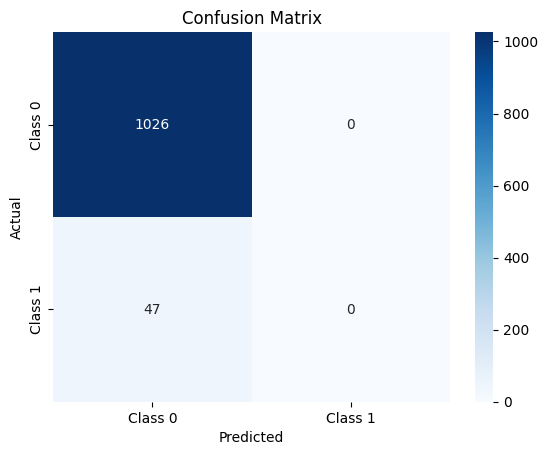

In [ ]:
# Create a Seaborn heatmap
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ac_lr

0.9561975768872321

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test_std)

confusion matrix :
[[1025    1]
 [  47    0]]


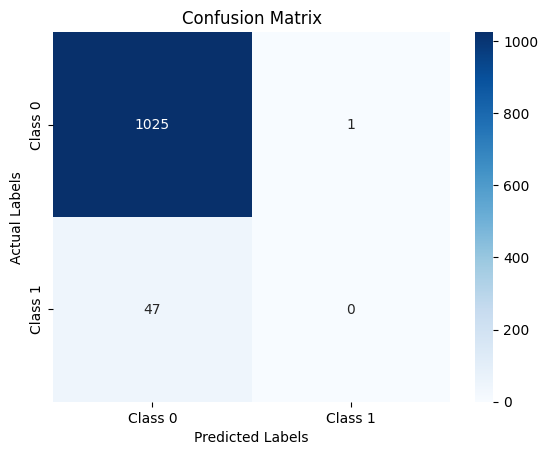

In [ ]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :')
print(cm_knn)
# Create a Seaborn heatmap
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ac_knn= accuracy_score(y_pred_knn,y_test)

In [ ]:
ac_knn

0.9552656104380243

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3, verbose=0, warm_start=False)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=3)

In [ ]:
y_pred_rf = rf.predict(x_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


confusion matrix :
[[1026    0]
 [  47    0]]


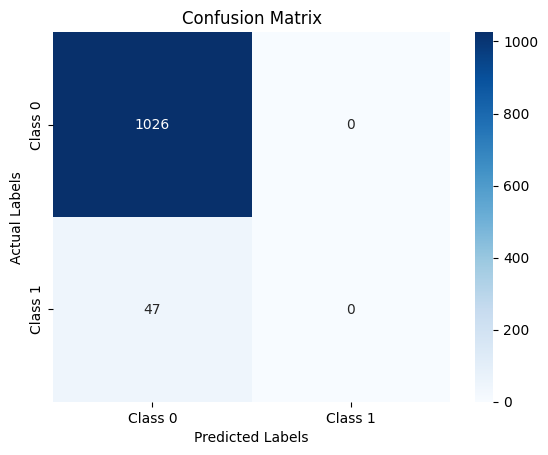

In [ ]:
cm_rf= confusion_matrix(y_test,y_pred_rf)
print('confusion matrix :')
print(cm_rf)
# Create a Seaborn heatmap
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ac_rf = accuracy_score(y_test,y_pred_rf)

In [ ]:
ac_rf

0.9561975768872321

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
sv.fit(x_train_std,y_train)

SVC()

In [ ]:
y_pred_sv = sv.predict(x_test_std)

confusion matrix :
[[1026    0]
 [  47    0]]


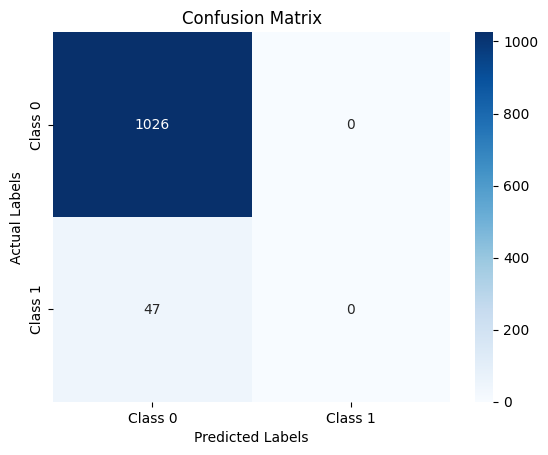

In [ ]:
cm_sv = confusion_matrix(y_test,y_pred_sv)
print('confusion matrix :')
print(cm_sv)
# Create a Seaborn heatmap
sns.heatmap(cm_sv, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ac_sv = accuracy_score(y_test,y_pred_sv)

In [ ]:
ac_sv

0.9561975768872321

# ridge classsifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
rc= RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=3, solver='auto',
                tol=0.0001)

In [ ]:
rc.fit(x_train_std,y_train)

RidgeClassifier(random_state=3)

In [ ]:
y_pred_rc = rc.predict(x_test_std)

confusion matrix :
[[1026    0]
 [  47    0]]


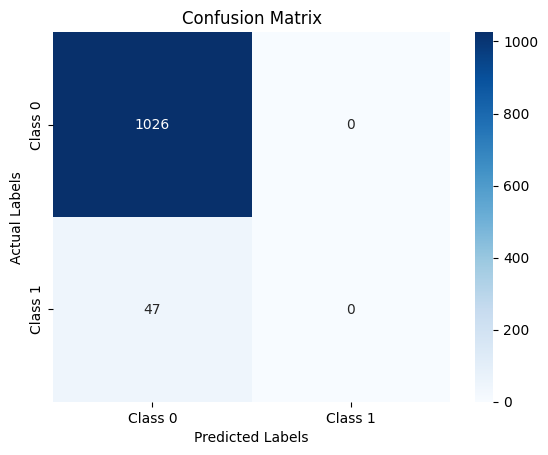

In [ ]:
cm_rc = confusion_matrix(y_test,y_pred_rc)
print('confusion matrix :')
print(cm_rc)
# Create a Seaborn heatmap
sns.heatmap(cm_rc, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ac_rc = accuracy_score(y_test,y_pred_rc)

In [ ]:
ac_rc

0.9561975768872321

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

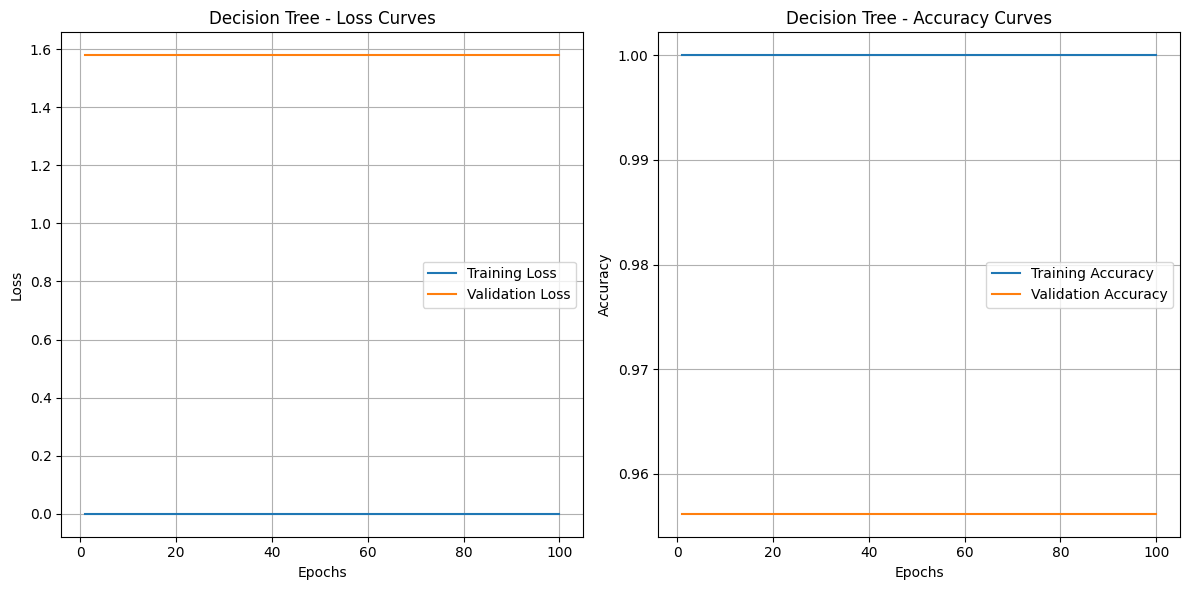

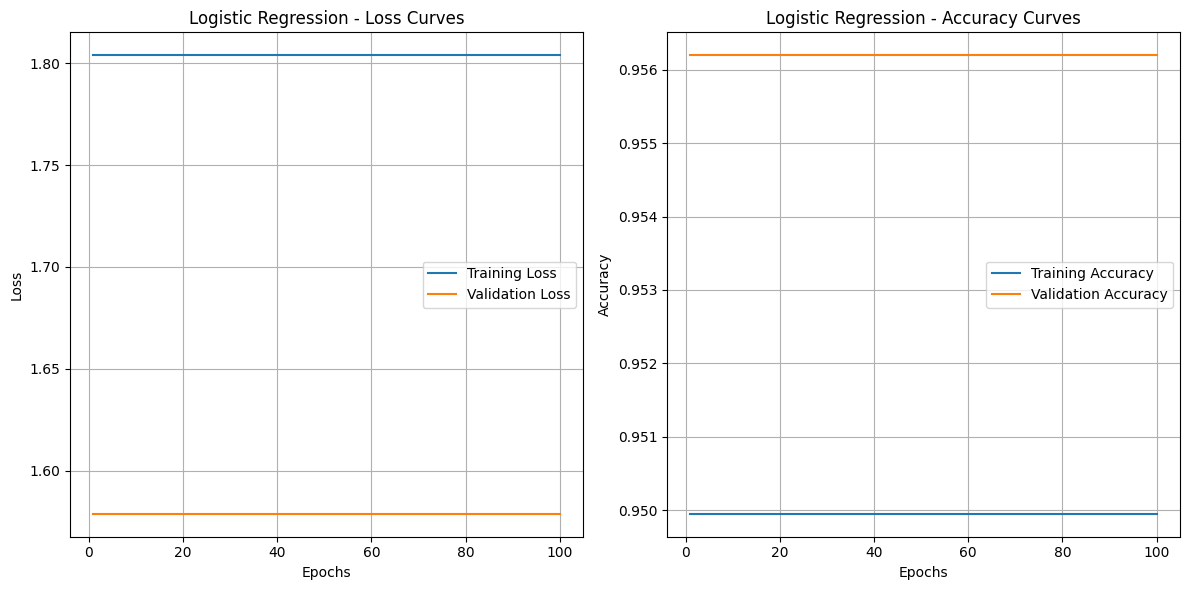

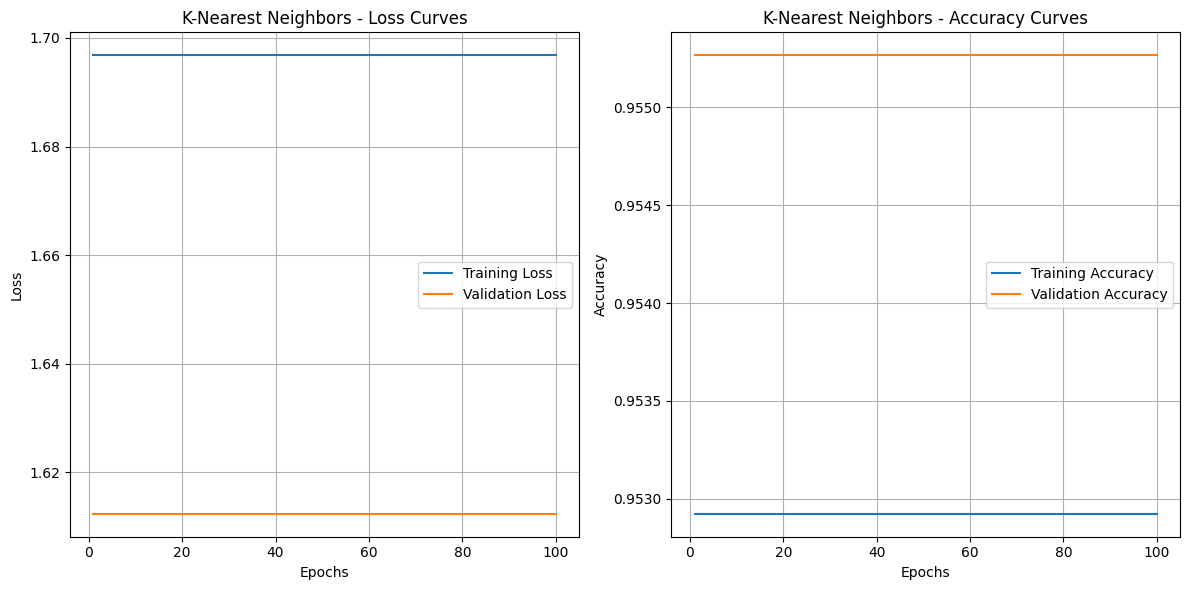

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

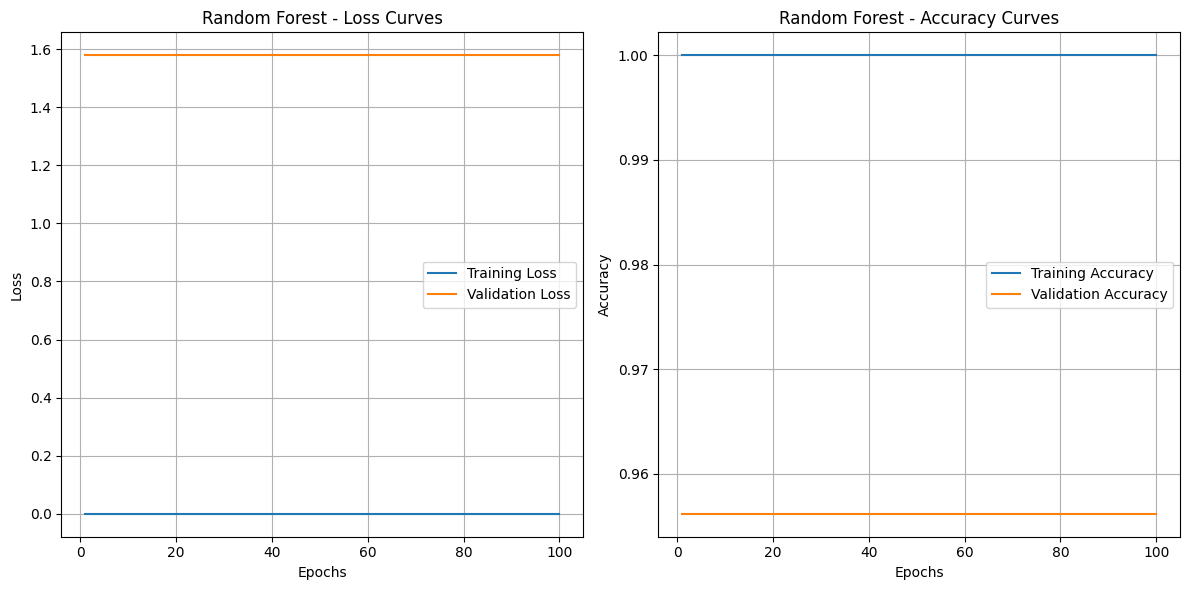

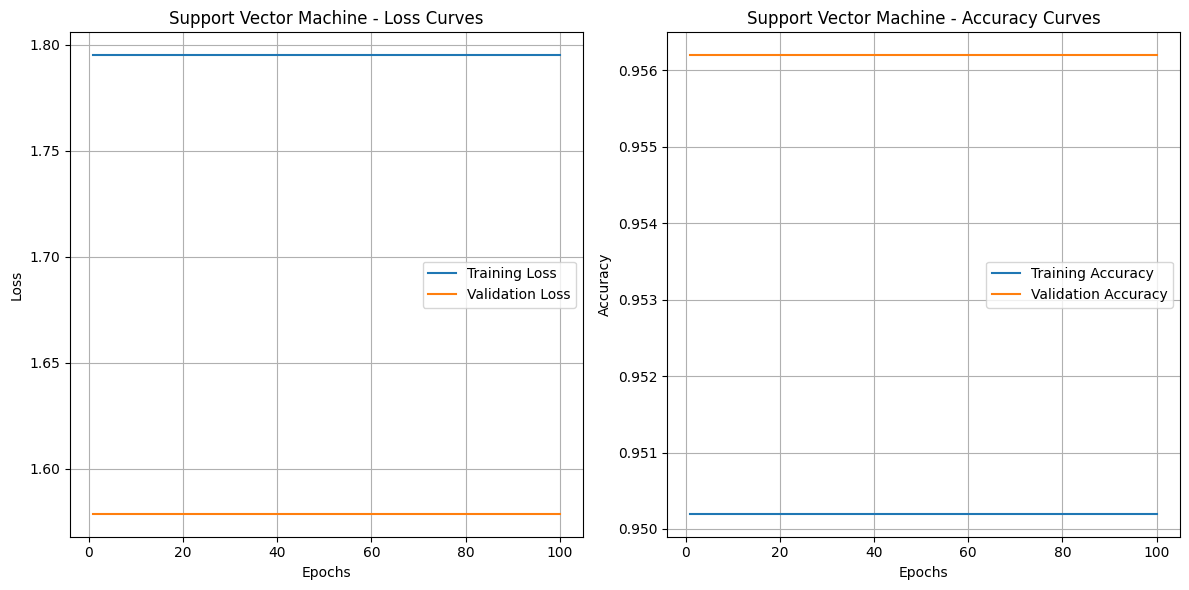

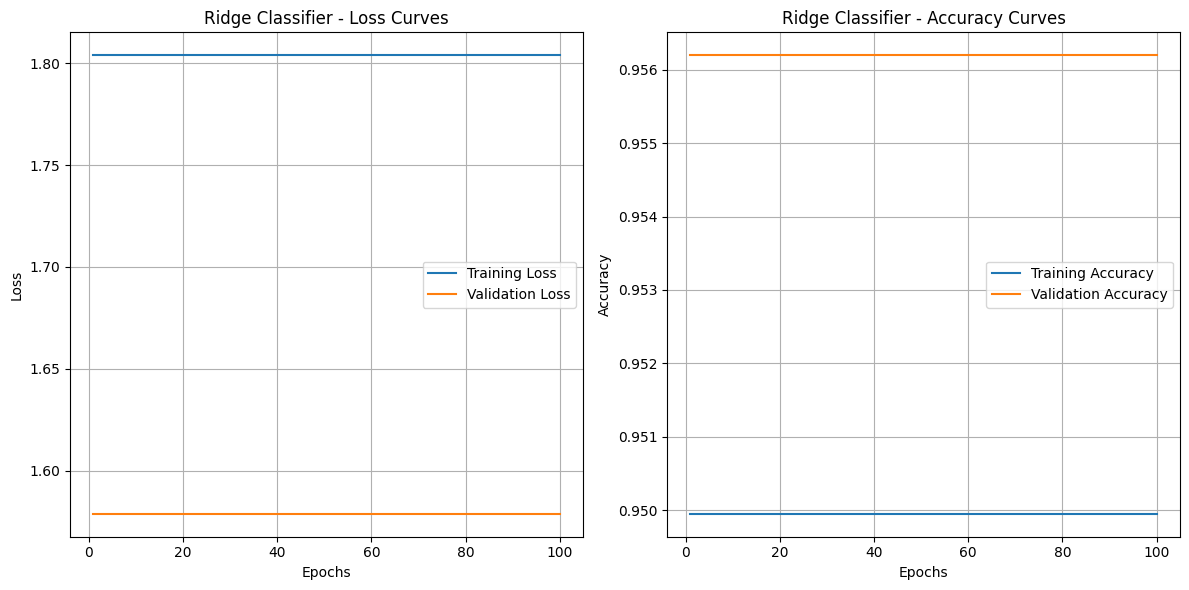

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Function to train a model and plot the loss and accuracy curves
def train_and_plot(model, x_train, y_train, x_val, y_val, model_name):
    epochs = 100  # You can adjust the number of epochs
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.fit(x_train, y_train)

        # Training set
        train_pred = model.predict(x_train)
        train_loss = log_loss(y_train, train_pred)
        train_accuracy = accuracy_score(y_train, train_pred)

        # Validation set
        val_pred = model.predict(x_val)
        val_loss = log_loss(y_val, val_pred)
        val_accuracy = accuracy_score(y_val, val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    # Plotting the curves
    plt.figure(figsize=(12, 6))

    # Loss curves
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.legend()
    plt.grid(True)

    # Accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Train and plot for Decision Tree
dt = DecisionTreeClassifier(random_state=3)
train_and_plot(dt, x_train, y_train, x_test_std, y_test, 'Decision Tree')

# Train and plot for Logistic Regression
lr = LogisticRegression(random_state=3)
train_and_plot(lr, x_train_std, y_train, x_test_std, y_test, 'Logistic Regression')

# Train and plot for K-Nearest Neighbors
knn = KNeighborsClassifier()
train_and_plot(knn, x_train_std, y_train, x_test_std, y_test, 'K-Nearest Neighbors')

# Train and plot for Random Forest
rf = RandomForestClassifier(random_state=3)
train_and_plot(rf, x_train, y_train, x_test_std, y_test, 'Random Forest')

# Train and plot for Support Vector Machine
sv = SVC()
train_and_plot(sv, x_train_std, y_train, x_test_std, y_test, 'Support Vector Machine')

# Train and plot for Ridge Classifier
rc = RidgeClassifier(random_state=3)
train_and_plot(rc, x_train_std, y_train, x_test_std, y_test, 'Ridge Classifier')


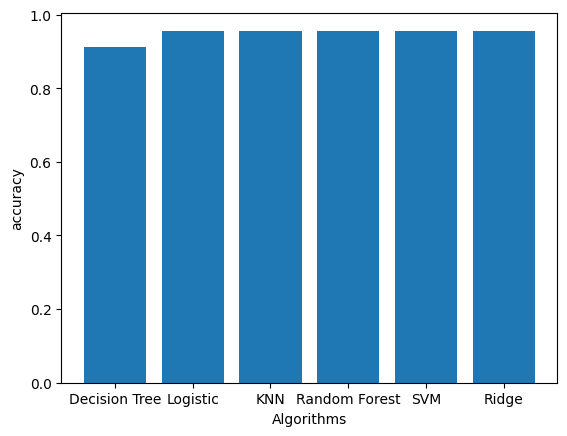

In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM','Ridge'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,ac_rc])
plt.xlabel("Algorithms")
plt.ylabel("accuracy")
plt.show()

In [ ]:

# Take input from the user for custom values
gender = int(input("Enter gender (0 for female, 1 for male): "))
age = float(input("Enter age: "))
hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
ever_married = int(input("Enter ever married (0 for No, 1 for Yes): "))
work_type = int(input("Enter work type (0 for govenment job, 1 for never worked, 2 for private, 3 for self employed, 4 for children): "))
residence_type = int(input("Enter residence type (0 for rural, 1 for urban): "))
avg_glucose_level = float(input("Enter average glucose level: "))
bmi = float(input("Enter BMI: "))
smoking_status = int(input("Enter smoking status (0 for not known, 1 for formerly smoked, 2 for never smoked, 3 for smokes): "))

# Create a DataFrame with the user input
custom_values = {
    'gender': gender,
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'ever_married': ever_married,
    'work_type': work_type,
    'Residence_type': residence_type,
    'avg_glucose_level': avg_glucose_level,
    'bmi': bmi,
    'smoking_status': smoking_status,
}

custom_data = pd.DataFrame([custom_values])

# Standardize the custom input data using the same scaler used for training
custom_data_std = std.transform(custom_data)

# Make predictions
prediction = lr.predict(custom_data_std)

# Output the prediction
if prediction[0] == 1:
    print("The person is predicted to have a stroke.")
else:
    print("The person is predicted not to have a stroke.")

